In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/Walmart DataSet.csv')

# Basic inspection
print("Dataset Shape:", df.shape)
display(df.head())

print("\nData Types & Missing Values:")
df.info()

Dataset Shape: (6435, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106



Data Types & Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Sort by Store and Date (VERY IMPORTANT for time series)
df = df.sort_values(by=['Store', 'Date'])

# Final check
print("Date range:", df['Date'].min(), "to", df['Date'].max())
print("Unique Stores:", df['Store'].nunique())

Date range: 2010-02-05 00:00:00 to 2012-10-26 00:00:00
Unique Stores: 45


In [5]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,6435.0,23.0,1.0,12.0,23.0,34.0,45.0,12.988182
Date,6435,2011-06-17 00:00:00,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,6435.0,1046964.877562,209986.25,553350.105,960746.04,1420158.66,3818686.45,564366.622054
Holiday_Flag,6435.0,0.06993,0.0,0.0,0.0,0.0,1.0,0.255049
Temperature,6435.0,60.663782,-2.06,47.46,62.67,74.94,100.14,18.444933
Fuel_Price,6435.0,3.358607,2.472,2.933,3.445,3.735,4.468,0.45902
CPI,6435.0,171.578394,126.064,131.735,182.616521,212.743293,227.232807,39.356712
Unemployment,6435.0,7.999151,3.879,6.891,7.874,8.622,14.313,1.875885


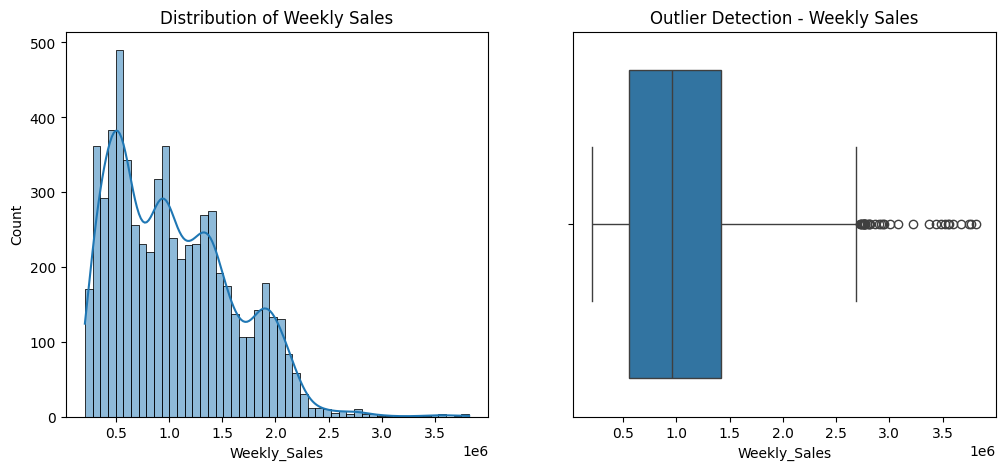

In [6]:
# Distribution & Outlier analysis for Weekly Sales

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x=df['Weekly_Sales'])
plt.title("Outlier Detection - Weekly Sales")

plt.show()

Average Weekly Sales:
Non-Holiday Weeks: 1041256.3802088555
Holiday Weeks: 1122887.8923555557


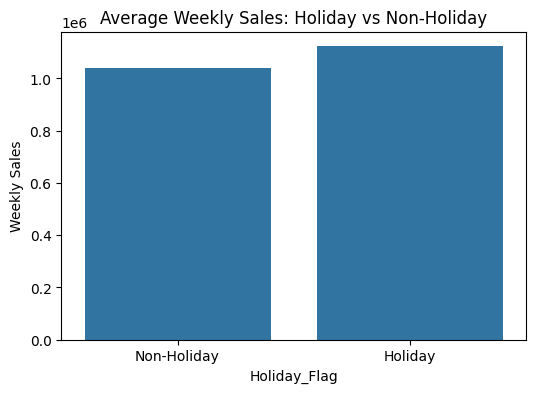

In [7]:
#  Holiday vs Non-Holiday Sales Comparison

holiday_sales = df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

print("Average Weekly Sales:")
print("Non-Holiday Weeks:", holiday_sales[0])
print("Holiday Weeks:", holiday_sales[1])

# Visualization
plt.figure(figsize=(6,4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.xticks([0,1], ['Non-Holiday', 'Holiday'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Weekly Sales")
plt.show()

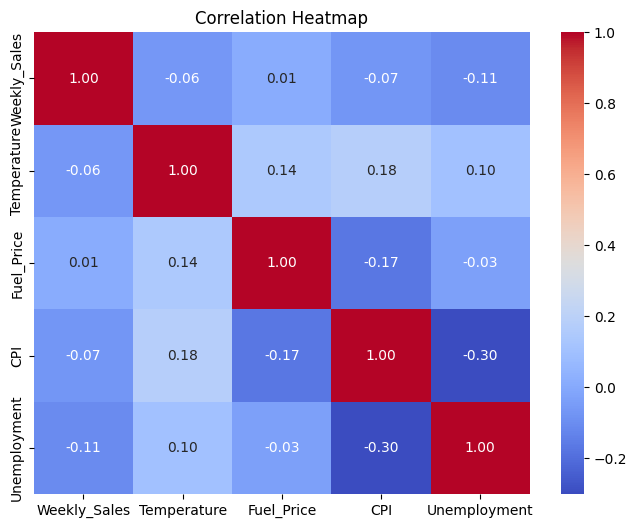

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.000000,-0.063810,0.009464,-0.072634,-0.106176
Temperature,-0.063810,1.000000,0.144982,0.176888,0.101158
Fuel_Price,0.009464,0.144982,1.000000,-0.170642,-0.034684
CPI,-0.072634,0.176888,-0.170642,1.000000,-0.302020
Unemployment,-0.106176,0.101158,-0.034684,-0.302020,1.000000


In [8]:
# Correlation analysis

corr_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

corr_matrix

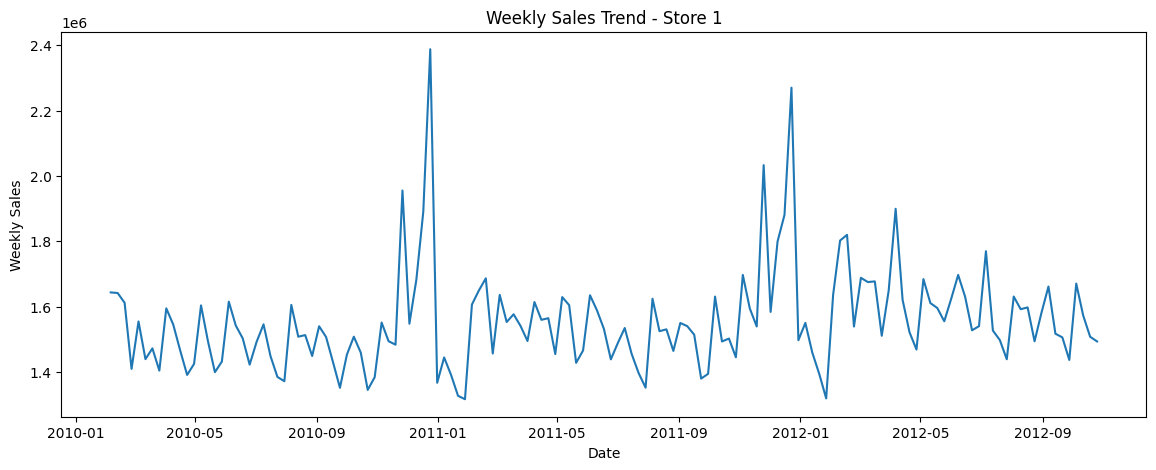

In [9]:
# Time series visualization for ONE store (Store 1)

store_1 = df[df['Store'] == 1]

plt.figure(figsize=(14,5))
plt.plot(store_1['Date'], store_1['Weekly_Sales'])
plt.title("Weekly Sales Trend - Store 1")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


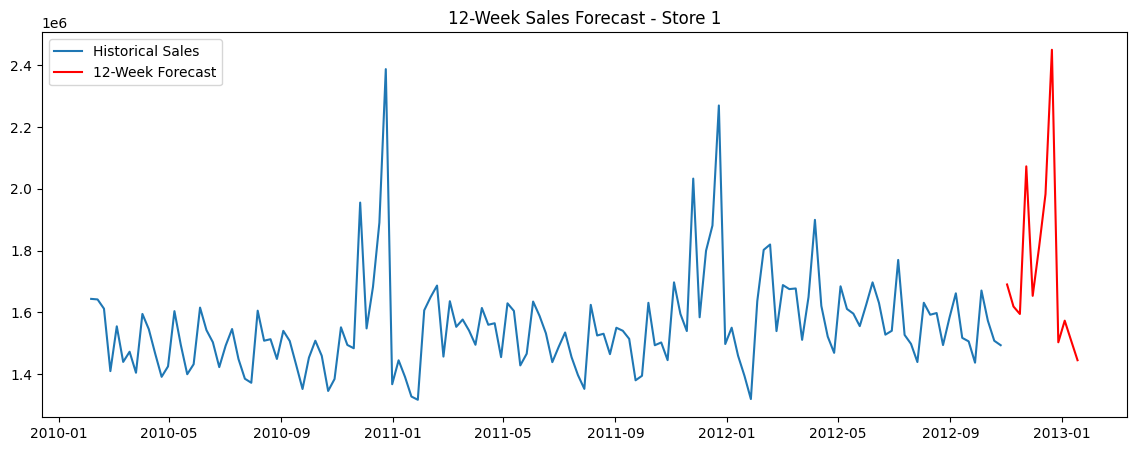

,0
2012-11-02,1.690364e+06
2012-11-09,1.618980e+06
2012-11-16,1.594767e+06
2012-11-23,2.073041e+06
2012-11-30,1.653547e+06
2012-12-07,1.811621e+06
2012-12-14,1.983284e+06
2012-12-21,2.450605e+06
2012-12-28,1.503144e+06
2013-01-04,1.573177e+06


In [10]:
# 12-week Forecast using Exponential Smoothing (Store 1)

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare time series
ts_store1 = store_1.set_index('Date')['Weekly_Sales']

# Fit model (weekly seasonality = 52)
model = ExponentialSmoothing(
    ts_store1,
    trend='add',
    seasonal='add',
    seasonal_periods=52
)

fit_model = model.fit()

# Forecast next 12 weeks
forecast_12 = fit_model.forecast(12)

# Plot forecast
plt.figure(figsize=(14,5))
plt.plot(ts_store1, label='Historical Sales')
plt.plot(forecast_12, label='12-Week Forecast', color='red')
plt.title("12-Week Sales Forecast - Store 1")
plt.legend()
plt.show()

forecast_12


In [11]:
# 12-week forecast for ALL stores

from statsmodels.tsa.holtwinters import ExponentialSmoothing

all_store_forecasts = {}

for store in df['Store'].unique():
    store_df = df[df['Store'] == store]
    ts = store_df.set_index('Date')['Weekly_Sales']

    model = ExponentialSmoothing(
        ts,
        trend='add',
        seasonal='add',
        seasonal_periods=52
    )

    fit = model.fit()
    forecast = fit.forecast(12)

    all_store_forecasts[store] = forecast

# Convert to DataFrame
forecast_df = pd.DataFrame(all_store_forecasts)

forecast_df.head()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
2012-11-02,1.690364e+06,2.025665e+06,480152.626233,2.265813e+06,363541.603678,1.584221e+06,519925.865205,9.886732e+05,582488.115589,1.851446e+06,...,269952.091619,557067.616091,464447.665497,1.599643e+06,1.010584e+06,1.366616e+06,594453.932076,588938.317340,332803.376212,7.885062e+05
2012-11-09,1.618980e+06,1.997609e+06,442322.145697,2.231119e+06,335177.458613,1.581107e+06,541710.089910,9.723244e+05,584953.885453,1.957112e+06,...,289189.086466,526871.050830,427854.953775,1.572669e+06,9.811049e+05,1.372026e+06,622379.628004,556658.502527,343473.281551,7.856316e+05
2012-11-16,1.594767e+06,2.016587e+06,428947.537350,2.307703e+06,331245.790698,1.598870e+06,518107.769920,9.469202e+05,581532.121757,1.919635e+06,...,279130.043609,533766.026210,425815.159246,1.646315e+06,8.955320e+05,1.354571e+06,554554.980030,551345.503909,345410.841668,7.449828e+05
2012-11-23,2.073041e+06,2.729486e+06,618911.463337,3.023910e+06,524945.550017,2.345676e+06,876987.220386,1.321624e+06,831353.263072,2.943608e+06,...,276178.195697,532699.611755,434312.269233,2.438615e+06,1.210140e+06,2.046552e+06,554842.199171,588967.842549,365205.948514,1.193533e+06
2012-11-30,1.653547e+06,2.084579e+06,530933.678222,2.287095e+06,384398.916686,1.764901e+06,583652.379009,1.016721e+06,641438.251327,2.192079e+06,...,228883.925031,526410.683101,434396.410540,1.724305e+06,1.044652e+06,1.407940e+06,522298.816260,507722.678996,325169.396688,8.912787e+05
